In [64]:
import torch
import torch.nn as nn
from train import data_load
from model import Model
import numpy as np
import matplotlib.pyplot as plt

In [71]:
model = Model(num_node=56)
model.load_state_dict(torch.load('/home/takeshi/CFD_python/checkpoint/step_10000.pth'))
model.eval()

Model(
  (fc1): Linear(in_features=2, out_features=56, bias=True)
  (fc2): Linear(in_features=56, out_features=56, bias=True)
  (fc3): Linear(in_features=56, out_features=56, bias=True)
  (fc4): Linear(in_features=56, out_features=56, bias=True)
  (fc5): Linear(in_features=56, out_features=56, bias=True)
  (fc6): Linear(in_features=56, out_features=56, bias=True)
  (fc7): Linear(in_features=56, out_features=56, bias=True)
  (fc8): Linear(in_features=56, out_features=56, bias=True)
  (fc9): Linear(in_features=56, out_features=1, bias=True)
)

In [72]:
dataset = data_load('dataset.pkl')

In [73]:
def get_all_input(dataset):
    '''
    for evaluate
    '''
    input_list = []
    label_list = []
    for t_index, t in enumerate(dataset['t']):
        for x_index, x in enumerate(dataset['x']):
            input_list.append(np.concatenate([t, x], axis=0))
            label_list.append([dataset['u'][x_index][0][t_index]])
    return torch.tensor(np.stack(input_list, axis=0), dtype=torch.float32), torch.tensor(label_list, dtype=torch.float32)

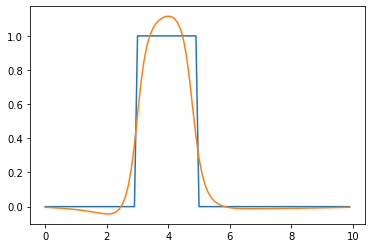

In [74]:
t = 5.0

eval_data = get_all_input(dataset)
input_data = eval_data[0]
label_data = eval_data[1]

pred = model(input_data).detach().numpy()
plt.plot(dataset['x'], label_data[int(t * 1000): int(t * 1000 + 100)], dataset['x'], pred[int(t * 1000): int(t * 1000 + 100)])